In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
LData_url='D:/study/s7 files/UG Project Files/Project Code/Final_Year_Project/Data/final data/DATA_3.csv'
LData=pd.read_csv(LData_url)
LData.drop(['Unnamed: 0'],inplace=True,axis=1)
LData.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,FAULT TYPE,Label,Label_no
0,0.011187,1.279438,-1.311982,2.591420,0.298905,0.089344,0.206043,1.311982,0.299114,4.386222,1.451708,6.367511,3.455019,-0.256605,8.113016,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0
1,0.013728,1.349116,-1.371020,2.720136,0.269052,0.072389,0.189617,1.371020,0.269402,5.089124,1.420770,7.230475,3.765359,-0.177962,9.071524,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0
2,0.012689,1.553767,-1.241053,2.794820,0.283981,0.080645,0.198589,1.553767,0.284264,5.465930,1.431419,7.824038,4.223392,-0.070134,9.823281,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0
3,0.013143,1.348490,-1.202876,2.551366,0.273550,0.074830,0.189475,1.348490,0.273865,4.923914,1.445388,7.116969,4.028215,0.031575,8.946333,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0
4,0.015546,1.299048,-1.366014,2.665062,0.281018,0.078971,0.197717,1.366014,0.281447,4.853532,1.423483,6.908922,4.118437,-0.093912,8.594890,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0


In [33]:
Data_modified=LData
del Data_modified['Label']
del Data_modified['FAULT TYPE']
Data_modified

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
0,0.011187,1.279438,-1.311982,2.591420,0.298905,0.089344,0.206043,1.311982,0.299114,4.386222,1.451708,6.367511,3.455019,-0.256605,8.113016,0
1,0.013728,1.349116,-1.371020,2.720136,0.269052,0.072389,0.189617,1.371020,0.269402,5.089124,1.420770,7.230475,3.765359,-0.177962,9.071524,0
2,0.012689,1.553767,-1.241053,2.794820,0.283981,0.080645,0.198589,1.553767,0.284264,5.465930,1.431419,7.824038,4.223392,-0.070134,9.823281,0
3,0.013143,1.348490,-1.202876,2.551366,0.273550,0.074830,0.189475,1.348490,0.273865,4.923914,1.445388,7.116969,4.028215,0.031575,8.946333,0
4,0.015546,1.299048,-1.366014,2.665062,0.281018,0.078971,0.197717,1.366014,0.281447,4.853532,1.423483,6.908922,4.118437,-0.093912,8.594890,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,0.014017,0.206112,-0.185876,0.391988,0.062031,0.003848,0.051067,0.206112,0.063595,3.241011,1.245316,4.036082,-0.066851,-0.152331,4.761452,9
2918,0.013751,0.216334,-0.214248,0.430582,0.066314,0.004398,0.054470,0.216334,0.067725,3.194307,1.243334,3.971592,-0.019693,-0.131660,4.656300,9
2919,0.015083,0.207155,-0.235110,0.442265,0.067297,0.004529,0.056020,0.235110,0.068967,3.409020,1.231121,4.196914,-0.091298,-0.275218,4.903307,9
2920,0.014486,0.187128,-0.230729,0.417857,0.061480,0.003780,0.050667,0.230729,0.063164,3.652878,1.246638,4.553818,-0.024136,-0.143131,5.378604,9


In [34]:
scaler=StandardScaler()
scaler.fit(Data_modified.drop('Label_no',axis=1))
scaled_features=scaler.transform(Data_modified.drop('Label_no',axis=1))
scaled_features

array([[-0.20546044, -0.13969171,  0.09951844, ...,  0.20563097,
        -1.18352138,  0.07620918],
       [ 0.18292767, -0.09169373,  0.05892247, ...,  0.28530258,
        -0.77217435,  0.30517026],
       [ 0.02411318,  0.04928239,  0.14829098, ...,  0.40289053,
        -0.20816859,  0.484744  ],
       ...,
       [ 0.39000423, -0.87834333,  0.84000042, ..., -0.70479206,
        -1.28087901, -0.69050104],
       [ 0.29878055, -0.89213916,  0.84301284, ..., -0.68755009,
        -0.5899856 , -0.57696581],
       [ 0.62738965, -0.86727793,  0.85348459, ..., -0.68567747,
        -0.12181454, -0.75439933]])

In [35]:
scaled_df=pd.DataFrame(scaled_features,columns=Data_modified.columns[:-1])
scaled_df['Label_no']=Data_modified['Label_no']
scaled_df.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
0,-0.205460,-0.139692,0.099518,-0.119825,-0.117697,-0.318184,-0.107373,-0.142322,-0.118787,0.204657,0.244874,0.130412,0.205631,-1.183521,0.076209,0
1,0.182928,-0.091694,0.058922,-0.075443,-0.224402,-0.372656,-0.205950,-0.102628,-0.225074,0.830043,0.094691,0.461132,0.285303,-0.772174,0.305170,0
2,0.024113,0.049282,0.148291,-0.049692,-0.171042,-0.346132,-0.152107,0.020242,-0.171910,1.165295,0.146387,0.688608,0.402891,-0.208169,0.484744,0
3,0.093537,-0.092125,0.174542,-0.133636,-0.208325,-0.364816,-0.206800,-0.117776,-0.209108,0.683052,0.214199,0.417632,0.352784,0.323827,0.275266,0
4,0.460803,-0.126183,0.062365,-0.094433,-0.181633,-0.351511,-0.157338,-0.105994,-0.181986,0.620432,0.107863,0.337901,0.375946,-0.332541,0.191315,0


In [36]:
X=scaled_df
Y=Data_modified['Label_no']
train_data,test_data = train_test_split(scaled_df,test_size=750,stratify = scaled_df['Label_no'], random_state=132)


In [37]:
rforest=RandomForestClassifier(n_estimators=200)

In [38]:
rforest.fit(train_data.iloc[:,:-1],train_data['Label_no'])

RandomForestClassifier(n_estimators=200)

In [39]:
test_predictions_RF=rforest.predict(test_data.iloc[:,:-1])
train_predictions_RF=rforest.predict(train_data.iloc[:,:-1])

In [40]:
fault_type = ['IR_7_1','IR_14_1','IR_21_1','BL_7_1','BL_14_1','BL_21_1','OR_7_1','OR_14_1','OR_21_1','NORMAL']
print(classification_report(test_data['Label_no'],test_predictions_RF,target_names=fault_type))

              precision    recall  f1-score   support

      IR_7_1       0.96      1.00      0.98        75
     IR_14_1       0.86      0.93      0.90        75
     IR_21_1       1.00      1.00      1.00        75
      BL_7_1       0.99      1.00      0.99        75
     BL_14_1       0.66      0.65      0.66        75
     BL_21_1       0.97      0.95      0.96        75
      OR_7_1       0.71      0.76      0.74        75
     OR_14_1       0.82      0.75      0.78        75
     OR_21_1       0.94      0.88      0.91        75
      NORMAL       1.00      1.00      1.00        75

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750



In [41]:

from sklearn.model_selection import GridSearchCV

In [42]:
parameter_grid={'n_estimators': [100, 200,250, 300]}

In [43]:
grid_value=GridSearchCV(RandomForestClassifier(),parameter_grid,refit=True,verbose=3)

In [44]:
grid_value.fit(train_data.iloc[:,:-1],train_data['Label_no'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............................n_estimators=100; total time=   0.4s
[CV 2/5] END ...............................n_estimators=100; total time=   0.4s
[CV 3/5] END ...............................n_estimators=100; total time=   0.4s
[CV 4/5] END ...............................n_estimators=100; total time=   0.4s
[CV 5/5] END ...............................n_estimators=100; total time=   0.4s
[CV 1/5] END ...............................n_estimators=200; total time=   0.8s
[CV 2/5] END ...............................n_estimators=200; total time=   0.9s
[CV 3/5] END ...............................n_estimators=200; total time=   0.9s
[CV 4/5] END ...............................n_estimators=200; total time=   0.9s
[CV 5/5] END ...............................n_estimators=200; total time=   1.0s
[CV 1/5] END ...............................n_estimators=250; total time=   1.5s
[CV 2/5] END ...............................n_est

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 250, 300]}, verbose=3)

In [45]:
grid_value.best_params_

{'n_estimators': 250}

In [46]:
grid_value.best_estimator_

RandomForestClassifier(n_estimators=250)

In [47]:
grid_predictions=grid_value.predict(test_data.iloc[:,:-1])

In [48]:
print(classification_report(test_data['Label_no'],grid_predictions,target_names=fault_type))

              precision    recall  f1-score   support

      IR_7_1       0.95      1.00      0.97        75
     IR_14_1       0.88      0.92      0.90        75
     IR_21_1       1.00      1.00      1.00        75
      BL_7_1       0.99      1.00      0.99        75
     BL_14_1       0.64      0.65      0.64        75
     BL_21_1       0.97      0.97      0.97        75
      OR_7_1       0.71      0.75      0.73        75
     OR_14_1       0.80      0.73      0.76        75
     OR_21_1       0.97      0.87      0.92        75
      NORMAL       1.00      1.00      1.00        75

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750



In [49]:
train_confusion_matrix = confusion_matrix(train_data['Label_no'], train_predictions_RF)
test_confusion_matrix = confusion_matrix(test_data['Label_no'], test_predictions_RF)
fault_type = ['IR_7_1','IR_14_1','IR_21_1','BL_7_1','BL_14_1','BL_21_1','OR_7_1','OR_14_1','OR_21_1','NORMAL']

Text(130.234375, 0.5, 'True')

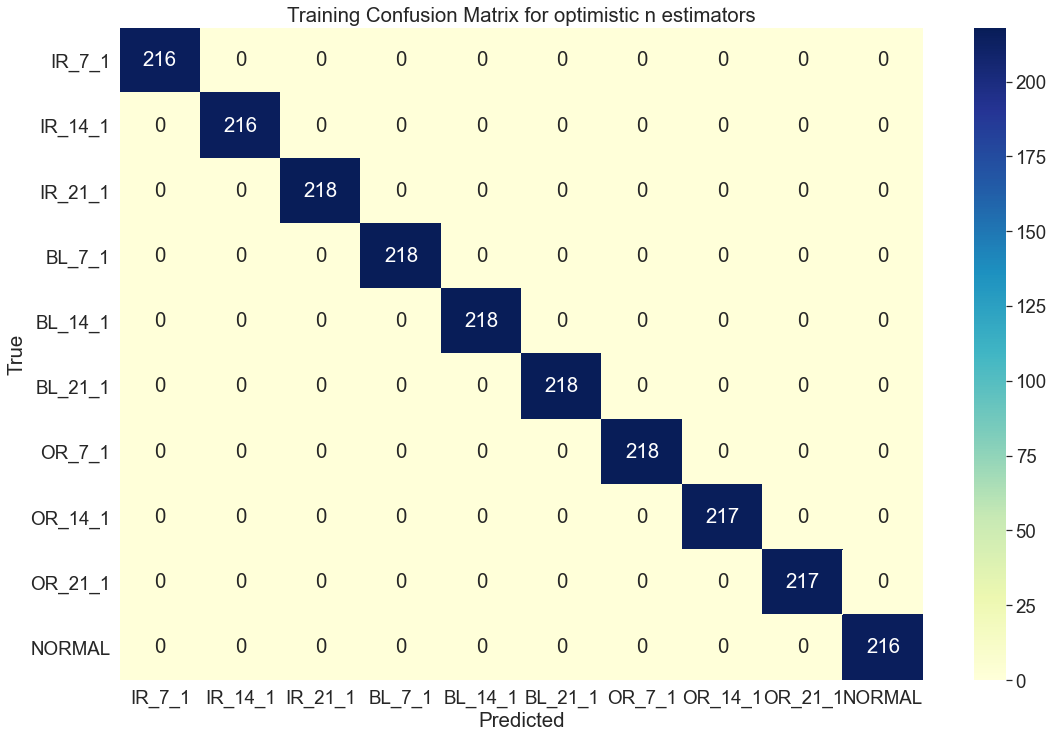

In [50]:

plt.figure(1,figsize=(18,12))
sns.heatmap(train_confusion_matrix, annot= True,cmap='YlGnBu',xticklabels=fault_type,yticklabels=fault_type,fmt='d')
plt.title('Training Confusion Matrix for optimistic n estimators')
plt.xlabel('Predicted')
plt.ylabel('True')


Text(130.234375, 0.5, 'True')

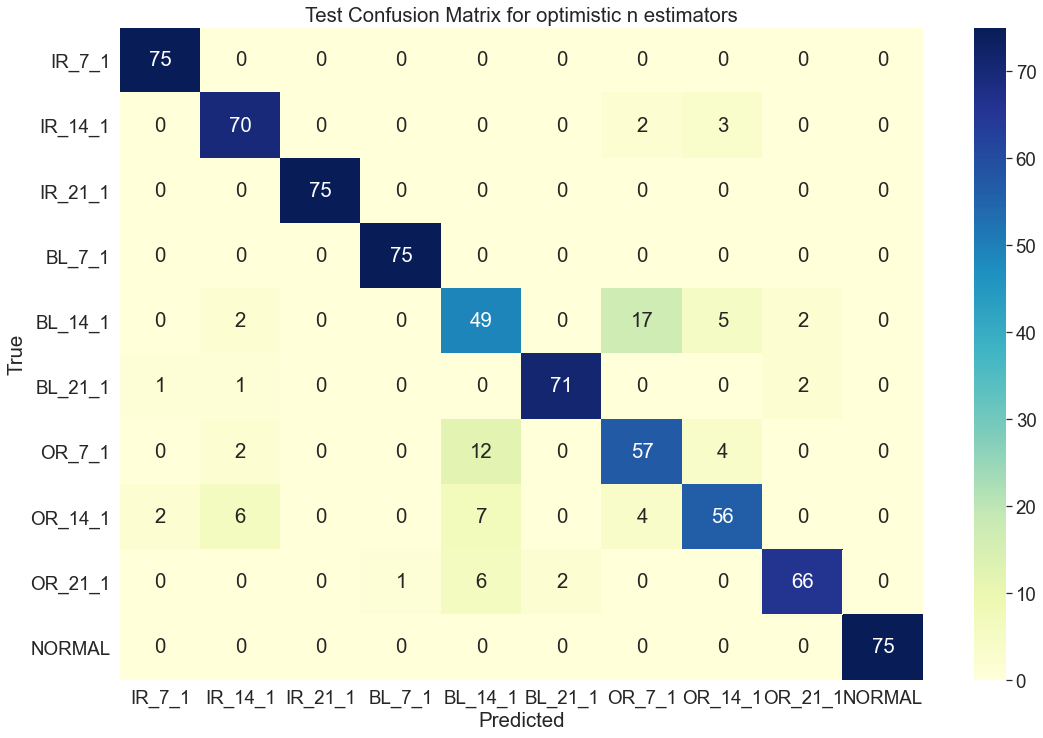

In [51]:
plt.figure(2,figsize=(18,12))
sns.heatmap(test_confusion_matrix,annot = True,cmap='YlGnBu',xticklabels=fault_type,yticklabels=fault_type)
plt.title('Test Confusion Matrix for optimistic n estimators')
plt.xlabel('Predicted')
plt.ylabel('True')


Text(130.234375, 0.5, 'True')

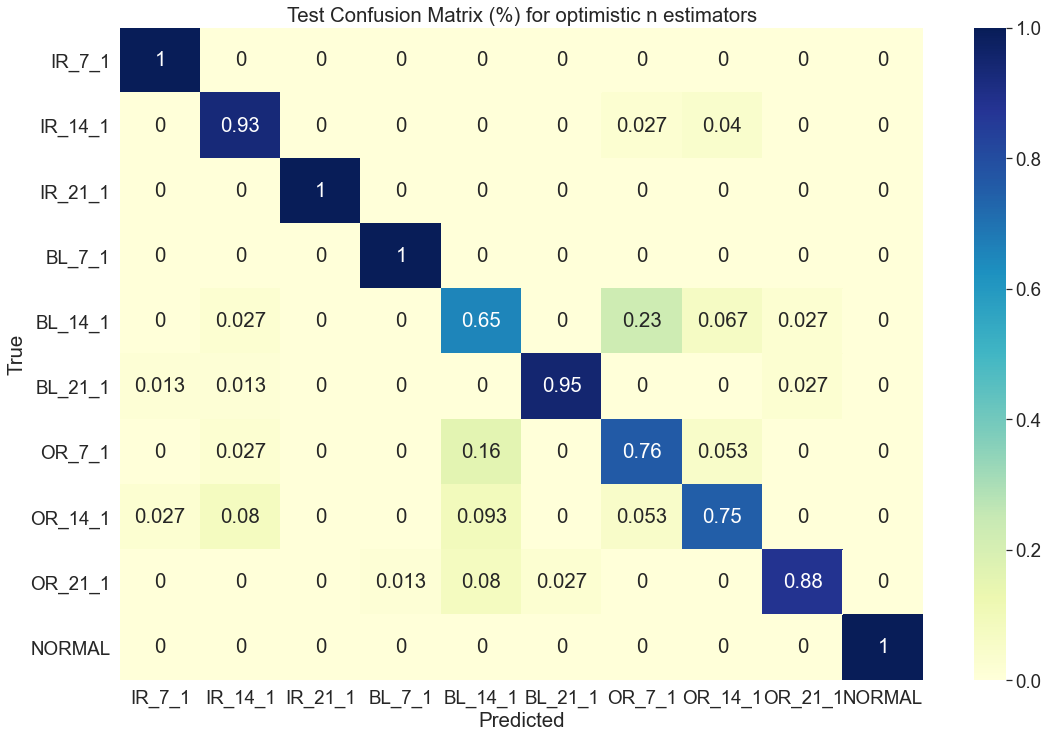

In [52]:
plt.figure(3,figsize=(18,12))
sns.heatmap(test_confusion_matrix/75,annot = True,cmap='YlGnBu',xticklabels=fault_type,yticklabels=fault_type)
plt.title('Test Confusion Matrix (%) for optimistic n estimators')
plt.xlabel('Predicted')
plt.ylabel('True')

,Features,Feature importance
0,Absolute_mean,0.133038
1,Mean,0.108657
2,Standard Deviation,0.097893
3,RMS,0.090930
4,Variance,0.083904
5,Range,0.061506
6,Shape factor,0.061161
7,Kurtosis,0.061001
8,Absolute_MAX,0.058066
9,Maximum_value,0.056714


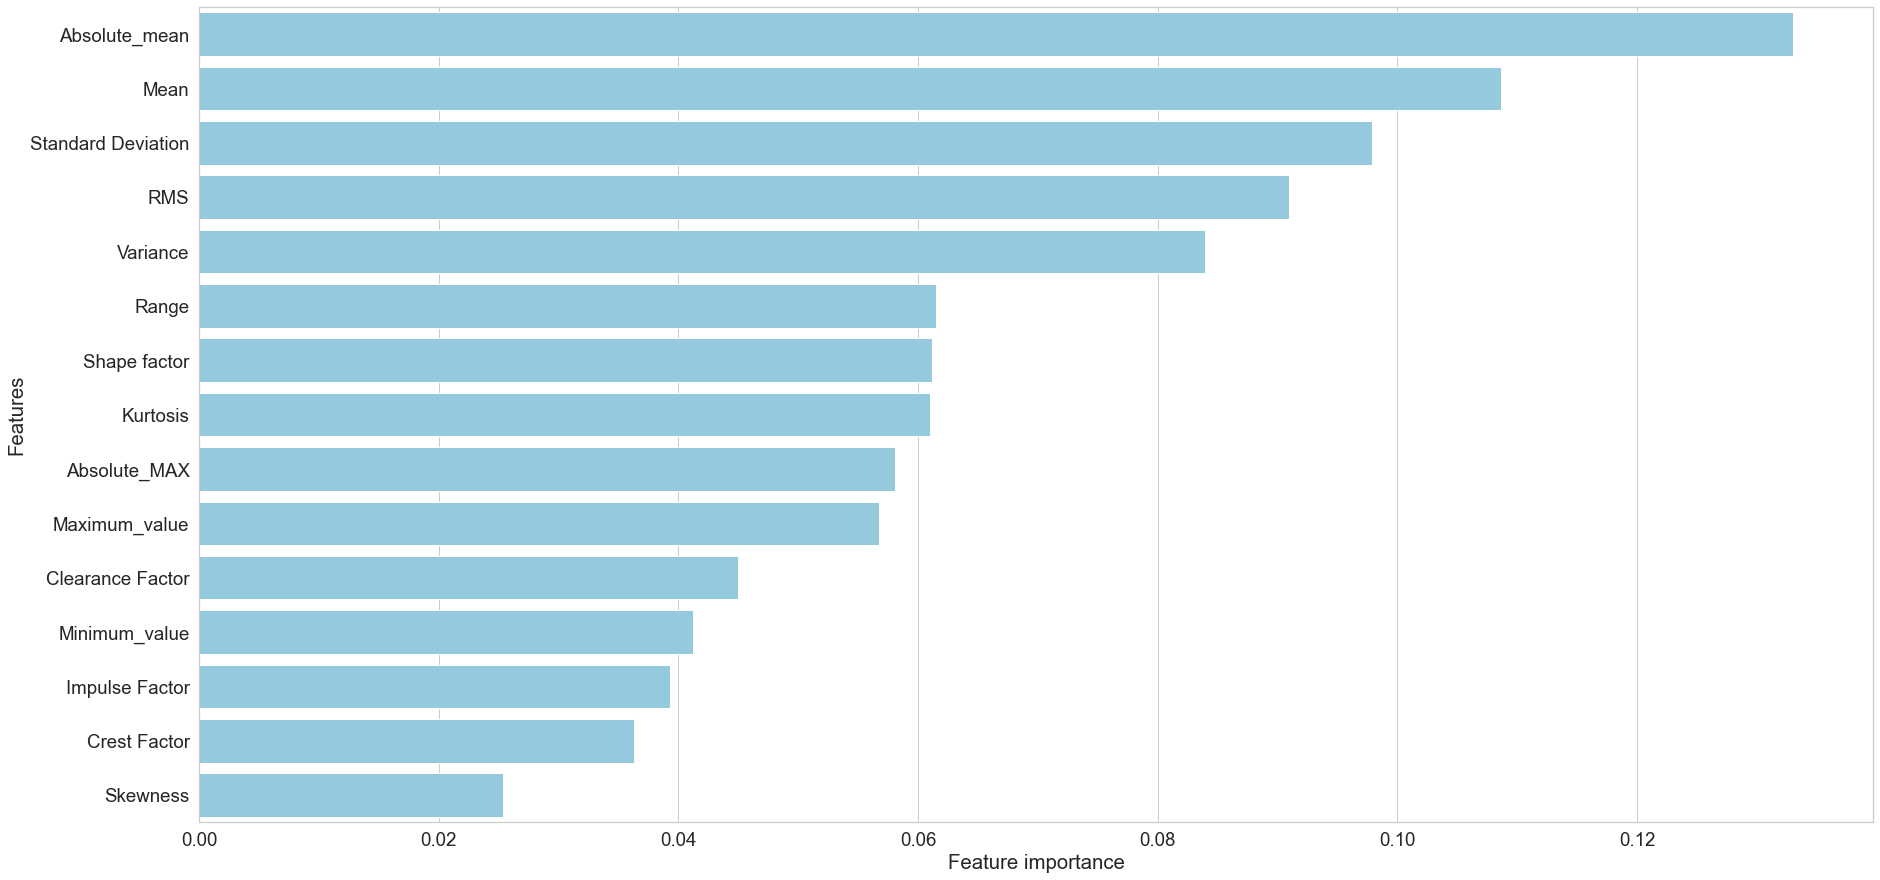

In [54]:
feats = {}
for feature, importance in zip(scaled_df.columns, rforest.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature importance'})
importances = importances.sort_values(by='Feature importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Feature importance'], y=importances['Features'], data=importances, color='skyblue')
display(importances)

In [ ]:
feature_importance =rforest.feature_importances_
# Check that importances sum is 1
feature_importance.sum()